In [4]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [93]:
x = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1)
x = np.vstack([x, [20]])  # outlier
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df
# scale : 기본 스케일, 평균과 표준 편차 사용
# robust_scale : 중앙값과 interquartile range 사용, 아웃라이어의 영향을 최소화
# minmax_scale : 최대/최솟값이 각각 1,0 이 되도록 스케일링
# maxabs_scale : 최대절대값과 0 이 각각 1,0 이 되도록 스케일링

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.950995,-1.000000,0.000000,-0.15
1,-2.0,-0.789809,-0.777778,0.043478,-0.10
2,-1.0,-0.628624,-0.555556,0.086957,-0.05
3,0.0,-0.467438,-0.333333,0.130435,0.00
4,1.0,-0.306253,-0.111111,0.173913,0.05
5,2.0,-0.145067,0.111111,0.217391,0.10
6,3.0,0.016119,0.333333,0.260870,0.15
7,4.0,0.177304,0.555556,0.304348,0.20
8,5.0,0.338490,0.777778,0.347826,0.25
9,20.0,2.756273,4.111111,1.000000,1.00


In [6]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))

old mean: [5.84333333 3.054      3.75866667 1.19866667]
old std:  [0.82530129 0.43214658 1.75852918 0.76061262]
new mean: [-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
new std:  [1. 1. 1. 1.]


/home/hskimim/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


- 만약 파이프라인을 이용하면 스케일링을 함수가 아닌 Scaler 클래스로 구현해야 한다.
- scale 함수에 대응하는 클래스는 StandardScaler 클래스이다.
    - 클래스 객체 생성
    - fit () method와 트레이닝 데이터를 사용하여 변환 계수 추정
    - transform() method를 사용하여 실제로 자료를 변환

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler() # 클래스 객체 생성
scaler.fit(data1) # 변환 계수 추정 data1 is for training.
data2 = scaler.transform(data1) # train data named data1 is transformed by test data named data2

In [9]:
data1.std(), data2.std()

(1.974000985027335, 1.0)

- 정규화(Normalization)은 스케일링과 달리 개별 데이터의 크기를 모두 같게 만들기 위한 변환이다. 따라서 개별 데이터에 대해 서로 다른 변환 계수가 적용된다.
- 다차원 독립 변수 벡터가 있을 때 각 벡터 원소들의 상대적 크기만 중요한 경우에 사용된다.

In [10]:
from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5, dtype=float) - 20, np.arange(5, dtype=float) - 2]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normlize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
norms (scale)
 [2. 1. 0. 1. 2.]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]
norms (normalize)
 [1. 1. 1. 1. 1.]


In [11]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data[:,:2]
data3 = normalize(data1)

/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


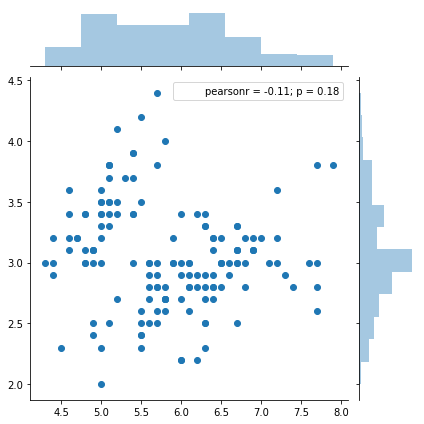

In [12]:
sns.jointplot(data1[:,0], data1[:,1])
plt.show()

/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


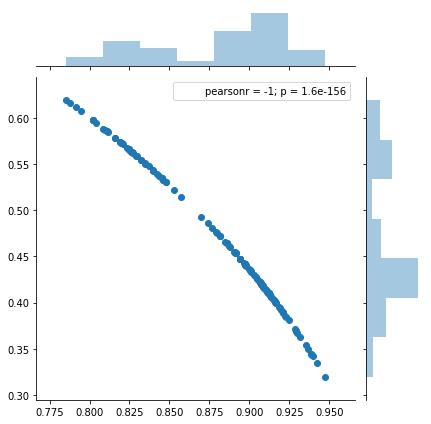

In [13]:
sns.jointplot(data3[:,0], data3[:,1])
plt.show()


we use `fit_transfrom()` on the train data so that we learn the train data and in the same time we scale the train data, we only use `transform()` on the test data becuz we use the scaling parameters learned on the train data to scale the test data.
we always learn our scaling parameters on the train and then use them on the test.

In [34]:
data1[:10]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1]])

data2 is data applied `fit_transform` method. so that we can learn the train data 'data1' and same time we scale the train data.

In [30]:
sc = StandardScaler()
data2 = sc.fit_transform(data1)
data2[:10]

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536]])

one-hot-encoder 는 0~ K-1의 값을 가지는 정수 스칼라값을 0 또는 1값을 가지는 K-차원 벡터로 변환한다. 만약 입력이 스칼라가 아니라 벡터이면 각 원소에 대해 인코딩된 결과를 모두 연력한다. 각 원소의 위치 정보는 feature_indices_속성에 저장된다. categorical_features 인수를 사용하여 인코딩이 되지 않도록 지정할 수도 있다.

In [64]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
ohe = OneHotEncoder()

In [66]:
X = np.array([[0],[1],[2]])
X

array([[0],
       [1],
       [2]])

In [67]:
ohe.fit(X)
ohe.n_values_ , ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3]), array([0, 1, 2]))

- `n_values` : 각 변수의 최대 클래스 갯수
- `feature_indices` : 입력이 벡터인 경우 각 원소를 내타내는 슬라이싱 정보
- `active_features` : 실제로 사용된 클래스 번호의 리스트

In [68]:
ohe.transform(X)

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [69]:
ohe.transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [70]:
X = np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2]]) 
X

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]])

In [71]:
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([2, 3, 5]), array([ 0,  2,  5, 10]), array([0, 1, 2, 3, 4, 5, 6, 7, 9]))

In [72]:
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

In [73]:
ohe = OneHotEncoder(categorical_features=[False, True, False])
ohe.fit_transform(X).toarray()

array([[1., 0., 0., 0., 4.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 2.]])

In [74]:
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3]), array([0, 1, 2]))

In [75]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit_transform([[1, 2], [np.nan, 3], [7, 6]])

array([[1., 2.],
       [4., 3.],
       [7., 6.]])

In [76]:
from sklearn.preprocessing import Binarizer
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
binarizer = Binarizer().fit(X) 
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [77]:
binarizer = Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [78]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [79]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [80]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [81]:
from sklearn.preprocessing import FunctionTransformer

def kernel(X):
    x0 = X[:, :1]
    x1 = X[:, 1:2]
    x2 = X[:, 2:3]
    X_new = np.hstack([x0, 2 * x1, x2 ** 2, np.log(x1)])
    return X_new

In [82]:
X = np.arange(12).reshape(4, 3)
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [83]:
kernel(X)

array([[  0.        ,   2.        ,   4.        ,   0.        ],
       [  3.        ,   8.        ,  25.        ,   1.38629436],
       [  6.        ,  14.        ,  64.        ,   1.94591015],
       [  9.        ,  20.        , 121.        ,   2.30258509]])

In [84]:
FunctionTransformer(kernel).fit_transform(X)

array([[  0.        ,   2.        ,   4.        ,   0.        ],
       [  3.        ,   8.        ,  25.        ,   1.38629436],
       [  6.        ,  14.        ,  64.        ,   1.94591015],
       [  9.        ,  20.        , 121.        ,   2.30258509]])

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = ['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B']
le.fit(y)
le.classes_

array(['A', 'B', 'C'], dtype='<U1')

In [87]:
y2 = le.transform(y) 
y2

array([0, 1, 0, 0, 1, 2, 2, 0, 2, 1])

In [88]:
le.inverse_transform(y2)


array(['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B'], dtype='<U1')

In [89]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = ['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B']
lb.fit(y)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [90]:
lb.classes_

array(['A', 'B', 'C'], dtype='<U1')

In [91]:
y2 = lb.transform(y)
y2

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])